**What is a Recommendation System?**

Simply put a Recommendation System is a filtration program whose prime goal is to predict the “rating” or “preference” of a user towards a domain-specific item or item. In our case, this domain-specific item is a movie, therefore the main focus of our recommendation system is to filter and predict only those movies which a user would prefer given some data about the user him or herself.

**What are the different filtration strategies?**

![](https://editor.analyticsvidhya.com/uploads/88506recommendation%20system.png)

**Collaborative Filtering**

This filtration strategy is based on the combination of the user’s behavior and comparing and contrasting that with other users’ behavior in the database. The history of all users plays an important role in this algorithm. The main difference between content-based filtering and collaborative filtering that in the latter, the interaction of all users with the items influences the recommendation algorithm while for content-based filtering only the concerned user’s data is taken into account.
There are multiple ways to implement collaborative filtering but the main concept to be grasped is that in collaborative filtering multiple user’s data influences the outcome of the recommendation. and doesn’t depend on only one user’s data for modeling.

**Let’s start coding up our own Movie recommendation system**

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
%matplotlib inline 

In [2]:
ratings_data = pd.read_csv("../input/the-movies-dataset/ratings_small.csv")
ratings_data = ratings_data.drop('timestamp', axis = 1)
ratings_data.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [3]:
movie_names = pd.read_csv("../input/the-movies-dataset/movies_metadata.csv")
movie_names = movie_names[['title', 'genres']]
movie_names.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,title,genres
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [4]:
movie_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   45460 non-null  object
 1   genres  45466 non-null  object
dtypes: object(2)
memory usage: 710.5+ KB


In [5]:
# movie_data = ratings_data.merge(movie_names, on='movieId')
movie_data = pd.concat([ratings_data, movie_names], axis=1)
movie_data.head()

,userId,movieId,rating,title,genres
0,1,31,2.5,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,1,1029,3.0,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,1,1061,3.0,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,1,1129,2.0,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,1,1172,4.0,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [6]:
trend = pd.DataFrame(movie_data.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(movie_data.groupby('title')['rating'].count()) 

trend.head()

,rating,total number of ratings
title,,
!Women Art Revolution,4.5,1
#1 Cheerleader Camp,5.0,1
#Horror,2.5,1
#chicagoGirl,1.0,1
"$1,000 on the Black",4.5,1


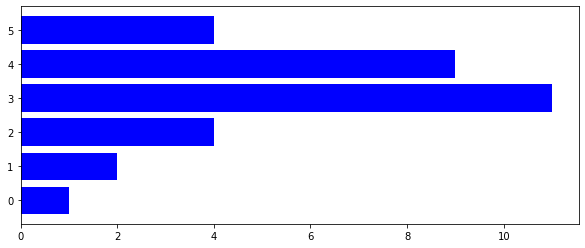

In [7]:
#plot rounded-up ratings with number of movies
plt.figure(figsize =(10, 4))
ax=plt.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.show()

In [8]:
# Calculate mean rating of all movies and check the popular high rating movies
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Rapt                          5.0
My Sister's Kids in Africa    5.0
Nasu: Summer in Andalusia     5.0
Borderline Normal             5.0
Native Land                   5.0
Natsamrat                     5.0
Natural Born Killers          5.0
Natural City                  5.0
Naturally Native              5.0
Nature Calls                  5.0
Name: rating, dtype: float64

**Pivoting**

Pivot Table : A pivot table is a table of statistics that summarizes the data of a more extensive table. This summary might include sums, averages, or other statistics, which the pivot table groups together in a meaningful way. Pivot tables are a technique in data processing.

![](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png)

In [9]:
movies_users = ratings_data.pivot(index=['userId'], columns=['movieId'], values='rating').fillna(0)
movies_users

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Removing sparsity**

Our final_dataset has dimensions of 671 × 9066 where most of the values are sparse. We are using only a small dataset but for the original large dataset of movie lens which has more than 100000 features, our system may run out of computational resources when that is feed to the model. To reduce the sparsity we use the csr_matrix function from the scipy library.

In [10]:
from scipy.sparse import csr_matrix
mat_movies_users=csr_matrix(movies_users.values)
mat_movies_users

<671x9066 sparse matrix of type '<class 'numpy.float64'>'
	with 100004 stored elements in Compressed Sparse Row format>

In [11]:
# Cosine Similarity
model_knn= NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

In [12]:
model_knn.fit(mat_movies_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [13]:
def Recommender(movie_name, data, model, n_recommendations):
    model.fit(data)
    movie_index = process.extractOne(movie_name, movie_names['title'])[2]
    print('Movie Selected: ',movie_names['title'][movie_index], ', Index: ', movie_index)
    print('Searching for recommendations.....')
    distances, indices = model.kneighbors(data[movie_index], n_neighbors=n_recommendations)
    recc_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
    recommend_frame = []
    for val in recc_movie_indices:
#         print(movie_names['title'][val[0]])
        recommend_frame.append({'Title':movie_names['title'][val[0]],'Distance':val[1]})
    
    df = pd.DataFrame(recommend_frame, index = range(1,n_recommendations))
     
    return df

In [14]:
n_recommendations = 20
Recommender('Jumanji', mat_movies_users, model_knn, n_recommendations)

Movie Selected:  Jumanji , Index:  1
Searching for recommendations.....


,Title,Distance
1,Mr. Wonderful,0.523668
2,The Silences of the Palace,0.523338
3,Tarantella,0.522694
4,The Usual Suspects,0.519348
5,Mi Vida Loca,0.516944
6,Antonia's Line,0.505929
7,The Man without a Face,0.473188
8,Boomerang,0.470424
9,Sleepless in Seattle,0.466811
10,Pinocchio,0.462066


**Summary**

The above recommendation system uses item to item collaborative approach. This system is the simpleset implementation of recommendation system and need a lot of tuning.Also the system's first recommendations will always be the popular movies which are voted by nore people so a change can also be made there.